___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, roc_curve,\
                            average_precision_score, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.svm import SVR
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
from ipywidgets import interact


import warnings

warnings.filterwarnings("ignore")

In [2]:
# !pip install xgboost==0.90
!pip install --user xgboost==1.7.6


In [3]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb.__version__

'1.7.6'

In [4]:
# To show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [6]:
df_female= pd.read_csv(r'C:\Users\solid\OneDrive\Desktop\SDA - ML\Project 2\ANSUR II FEMALE Public.csv')

In [7]:
df_male= pd.read_csv(r'C:\Users\solid\OneDrive\Desktop\SDA - ML\Project 2\ANSUR II MALE Public.csv', encoding="ISO-8859-1")

## Explore Data

### Exploring the Female dataset

In [8]:
df_female.head(2)

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand


In [9]:
df_female.shape

(1986, 108)

In [10]:
df_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB


In [11]:
df_female.describe().T

,count,mean,std,min,25%,50%,75%,max
SubjectId,1986.0,22306.606244,20904.730297,10037.0,17667.00,22096.5,26089.75,920103.0
abdominalextensiondepthsitting,1986.0,229.651057,31.464691,155.0,207.00,227.0,249.00,358.0
acromialheight,1986.0,1335.095166,58.079885,1115.0,1298.00,1332.0,1374.00,1536.0
acromionradialelength,1986.0,311.198389,17.164691,249.0,300.00,311.0,323.00,371.0
anklecircumference,1986.0,215.739678,14.891757,170.0,205.00,215.0,225.00,275.0
axillaheight,1986.0,1239.029708,55.801958,1038.0,1202.00,1236.0,1277.00,1419.0
balloffootcircumference,1986.0,228.110272,11.771007,194.0,220.00,227.0,236.00,270.0
balloffootlength,1986.0,182.051360,9.641920,151.0,175.00,182.0,188.00,216.0
biacromialbreadth,1986.0,365.348943,18.298851,283.0,353.00,365.0,378.00,422.0
bicepscircumferenceflexed,1986.0,305.578550,30.757033,216.0,285.00,304.0,324.00,435.0


In [12]:
#Checking for null values. True means there are no null values 
df_female.isnull().sum().any()

True

In [13]:
print(df_female.columns.tolist())


['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength', 'heel

In [14]:
# Finding if there are any diff between the columns names of the two datasets
df_female.columns.difference(df_male.columns)  

Index(['SubjectId'], dtype='object')

In [15]:
df_male.columns.difference(df_female.columns)  

Index(['subjectid'], dtype='object')

In [16]:
df_male.rename(columns={"Subjectid":"SubjectId"}, inplace=True)

In [17]:
# making sure they have the same column names
df_female.columns.equals(df_male.columns)

False

### Exploring Male dataset

In [18]:
df_male.head(2)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand


In [19]:
df_male.shape

(4082, 108)

In [20]:
df_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


In [21]:
df_male.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,4082.0,20003.370897,6568.435122,10027.0,14270.25,17236.5,27315.75,29452.0
abdominalextensiondepthsitting,4082.0,254.650906,37.327178,163.0,227.00,251.0,279.00,451.0
acromialheight,4082.0,1440.736894,63.287242,1194.0,1398.00,1439.0,1481.00,1683.0
acromionradialelength,4082.0,335.244488,17.482795,270.0,324.00,335.0,346.00,393.0
anklecircumference,4082.0,229.343949,14.649102,156.0,219.25,228.0,239.00,293.0
axillaheight,4082.0,1329.082068,59.516123,1106.0,1289.00,1328.0,1367.00,1553.0
balloffootcircumference,4082.0,252.017148,12.936131,186.0,243.00,252.0,261.00,306.0
balloffootlength,4082.0,200.935081,10.470947,156.0,194.00,201.0,208.00,245.0
biacromialbreadth,4082.0,415.675649,19.161654,337.0,403.00,415.0,428.00,489.0
bicepscircumferenceflexed,4082.0,358.135718,34.618093,246.0,335.00,357.0,380.00,490.0


In [22]:
#Checking for null values. True means there are no null values 
df_male.isnull().sum().any()

True

In [23]:
print(df_male.columns.tolist())

['subjectid', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength', 'heel

In [24]:
# Join the two datasets using concat
df= pd.concat([df_female,df_male], axis=0, ignore_index=True)

In [25]:
df.sample(10)

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,subjectid
1241,25547.0,229,1311,310,226,1214,227,185,346,319,271,437,69,330,298,133,1035,238,829,603,504,351,1364,254,913,240,1155,785,623,327,33,58,20,207,725,91,257,317,264,470,439,1031,75,183,184,143,546,197,317,76,356,392,1023,655,383,391,447,498,463,60,398,112,341,364,1259,106,379,247,1018,333,122,826,784,542,1618,1600,1324,1068,619,161,738,434,114,845,1487,406,280,837,218,352,974,648,149,771,Female,10-Nov-11,Fort Gordon,Regular Army,Combat Service Support,25W,Delaware,2,NaN,2,43,63,144,Left hand,NaN
50,11782.0,225,1408,331,215,1306,218,181,379,288,284,445,66,310,283,130,1050,230,870,608,498,367,1490,271,954,267,1219,823,625,365,32,66,25,236,808,85,244,325,248,496,447,1109,79,187,181,153,568,193,311,63,382,423,1054,620,366,408,475,530,478,63,386,119,323,357,1424,112,392,246,1084,362,152,909,843,580,1709,1720,1398,1106,637,172,784,469,129,884,1605,470,308,890,216,391,1031,696,152,830,Female,3-Nov-10,Fort Hood,Regular Army,Combat Support,68G,Virginia,1,NaN,1,24,67,150,Right hand,NaN
1006,23363.0,250,1351,317,235,1251,223,193,348,365,263,455,75,313,287,133,1102,245,845,641,543,397,1394,263,1000,264,1131,824,609,365,31,53,20,191,717,92,255,322,267,539,456,1075,79,188,184,160,587,200,328,76,375,441,1001,620,352,368,466,528,493,58,413,115,342,371,1294,112,404,255,1037,344,131,833,821,570,1673,1634,1334,1062,648,168,801,453,130,850,1551,379,310,878,221,362,1006,764,158,764,Female,4-Oct-11,Fort Bragg,Regular Army,Combat Support,42A,North Carolina,2,NaN,2,24,64,167,Right hand,NaN
4184,NaN,289,1434,358,233,1324,243,205,424,394,296,533,74,336,323,154,1151,268,867,644,526,406,1526,278,1112,283,1280,845,641,339,33,70,27,218,810,98,272,352,297,580,482,1135,85,207,192,167,573,187,356,73,402,426,1055,625,407,440,485,552,499,70,424,121,396,431,1465,112,416,278,1185,382,156,924,949,610,1903,1762,1451,1121,719,201,863,472,136,898,1720,512,390,1071,270,388,1036,976,181,825,Male,25-Jul-11,Fort Stewart,Regular Army,Combat Service Support,74D,Texas,3,Mexican,3,32,70,215,Right hand,20168.0
96,13036.0,236,1206,277,207,1098,222,177,350,301,269,459,64,295,277,130,1045,248,744,583,468,370,1272,270,951,266,1054,691,645,346,34,57,21,251,700,88,232,296,265,534,394,976,73,1

In [26]:
df.Gender.value_counts()

Male      4082
Female    1986
Name: Gender, dtype: int64

In [27]:
df.duplicated().sum()

0

In [28]:
df.DODRace.value_counts(dropna=False)

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

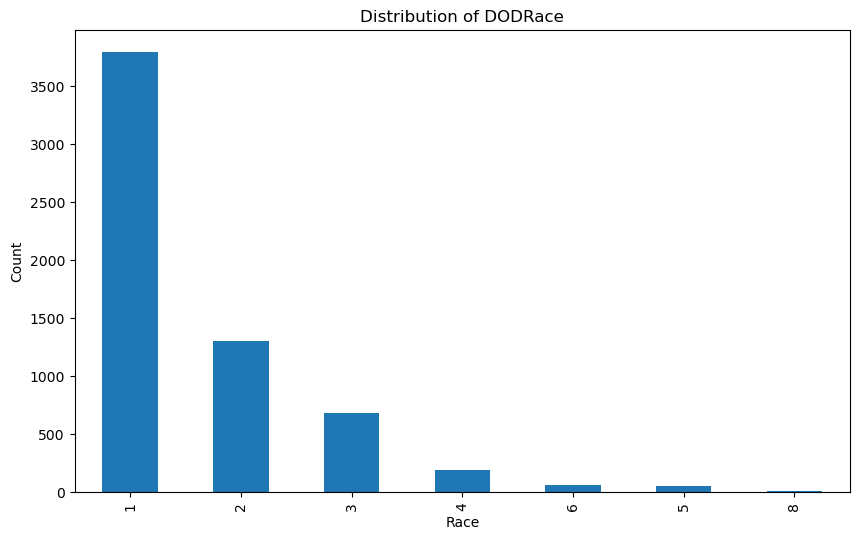

In [29]:
value_counts = df["DODRace"].value_counts()


plt.figure(figsize=(10, 6))  
value_counts.plot(kind="bar")
plt.title("Distribution of DODRace")
plt.xlabel("Race")
plt.ylabel("Count")
plt.show()

<Axes: ylabel='Gender,DODRace'>

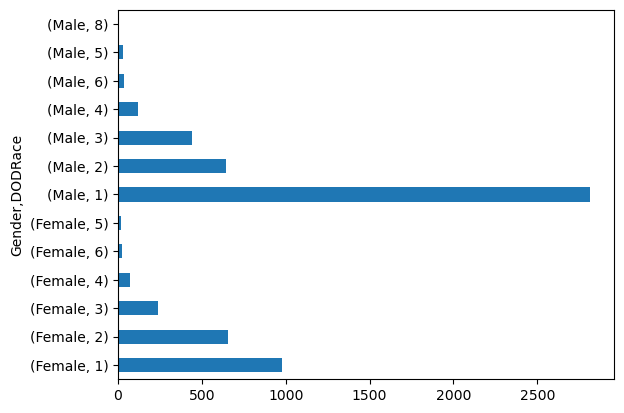

In [30]:
df.groupby(["Gender"])["DODRace"].value_counts().plot(kind="barh")

In [31]:
# looking for and droping columns with the most null values 
will_drop = []

for col in df:
    if(df[col].isnull().sum()>(df.shape[0]//3)):
        will_drop.append(col)
will_drop      

['SubjectId', 'Ethnicity']

In [32]:
df.drop(will_drop, axis=1, inplace=True)

In [33]:
df.isnull().sum().any()

True

In [34]:
df.DODRace.value_counts(dropna=False)

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [35]:
drop_col = [
    "Date", "Installation", "Component", "Branch", "PrimaryMOS",
    "Weightlbs", "Heightin", "subjectid", "SubjectNumericRace"
]



df.drop(drop_col, axis=1, inplace=True)

In [36]:
df.DODRace.value_counts(dropna=False)

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [37]:
# Droping unneccery values, including only three races, White(1), Black(2) and Hispanic(3)
drop_model = df.DODRace.value_counts()[df.DODRace.value_counts() <= 200].index
drop_model

Int64Index([4, 6, 5, 8], dtype='int64')

In [38]:
for i in drop_model:
    drop_index = df[df['DODRace'] == i].index
    df.drop(index = drop_index, inplace=True)

df.reset_index(drop=True, inplace=True)


In [39]:
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,Germany,2,26,Right hand
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,California,3,21,Right hand
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,Texas,1,23,Right hand
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,District of Columbia,2,22,Right hand
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,Female,Texas,1,45,Right hand


In [40]:
df.reset_index(drop=True, inplace=True)

In [41]:
df.DODRace.value_counts(dropna=False)

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [42]:
df_object = df.select_dtypes(include ="object").head()
df_object

,Gender,SubjectsBirthLocation,WritingPreference
0,Female,Germany,Right hand
1,Female,California,Right hand
2,Female,Texas,Right hand
3,Female,District of Columbia,Right hand
4,Female,Texas,Right hand


In [43]:
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())

Gender                        : 2
SubjectsBirthLocation         : 136
WritingPreference             : 3


In [44]:
df.SubjectsBirthLocation.value_counts()

California                417
New York                  411
Texas                     386
Indiana                   264
Illinois                  210
Florida                   210
Oklahoma                  205
Michigan                  194
Minnesota                 194
Mississippi               193
Georgia                   168
Alabama                   164
South Carolina            161
North Carolina            145
Ohio                      139
Louisiana                 136
Pennsylvania              130
Virginia                  113
Massachusetts             109
Wisconsin                  99
Germany                    90
Puerto Rico                88
New Jersey                 88
Missouri                   83
Maryland                   78
Colorado                   78
Arizona                    75
Tennessee                  74
Kentucky                   67
Kansas                     62
Washington                 61
Iowa                       55
South Dakota               53
Arkansas  

In [45]:
#Deleting cities and contries with low values 
drop_model2 = df.SubjectsBirthLocation.value_counts()[df.SubjectsBirthLocation.value_counts() <= 40].index
drop_model2

Index(['Oregon', 'Mexico', 'Connecticut', 'Jamaica', 'Nebraska', 'Utah',
       'West Virginia', 'Nevada', 'Idaho', 'District of Columbia',
       ...
       'Bulgaria', 'British Virgin Islands', 'Sri Lanka', 'Azerbaijan',
       'Venezuela', 'Bosnia and Herzegovina', 'Bermuda', 'Denmark',
       'South Korea', 'Guatemala'],
      dtype='object', length=102)

In [46]:
for i in drop_model2:
    drop_index = df[df['SubjectsBirthLocation'] == i].index
    df.drop(index = drop_index, inplace=True)

df.reset_index(drop=True, inplace=True)


In [47]:
df.SubjectsBirthLocation.value_counts()

California        417
New York          411
Texas             386
Indiana           264
Illinois          210
Florida           210
Oklahoma          205
Michigan          194
Minnesota         194
Mississippi       193
Georgia           168
Alabama           164
South Carolina    161
North Carolina    145
Ohio              139
Louisiana         136
Pennsylvania      130
Virginia          113
Massachusetts     109
Wisconsin          99
Germany            90
Puerto Rico        88
New Jersey         88
Missouri           83
Maryland           78
Colorado           78
Arizona            75
Tennessee          74
Kentucky           67
Kansas             62
Washington         61
Iowa               55
South Dakota       53
Arkansas           53
Name: SubjectsBirthLocation, dtype: int64

In [48]:
# it seems that SubjectsBirthLocation will complicate the outcome of the model, i will delete it for now
#df= df.drop(['SubjectsBirthLocation'], axis=1)

In [49]:
# This is a dictionary of states and their regions.
states_by_region = {
    "Alabama": "South",
    "Alaska": "West",
    "Arizona": "West",
    "Arkansas": "South",
    "California": "West",
    "Colorado": "West",
    "Connecticut": "Northeast",
    "Delaware": "Mid Atlantic",
    "Florida": "South",
    "Georgia": "South",
    "Hawaii": "West",
    "Idaho": "West",
    "Illinois": "Midwest",
    "Indiana": "Midwest",
    "Iowa": "Midwest",
    "Kansas": "Midwest",
    "Kentucky": "South",
    "Louisiana": "South",
    "Maine": "Northeast",
    "Maryland": "Mid Atlantic",
    "Massachusetts": "Northeast",
    "Michigan": "Midwest",
    "Minnesota": "Midwest",
    "Mississippi": "South",
    "Missouri": "Midwest",
    "Montana": "West",
    "Nebraska": "Midwest",
    "Nevada": "West",
    "New Hampshire": "Northeast",
    "New Jersey": "Mid Atlantic",
    "New Mexico": "West",
    "New York": "Northeast",
    "North Carolina": "South",
    "North Dakota": "Midwest",
    "Ohio": "Midwest",
    "Oklahoma": "South",
    "Oregon": "West",
    "Pennsylvania": "Mid Atlantic",
    "Rhode Island": "Northeast",
    "South Carolina": "South",
    "South Dakota": "Midwest",
    "Tennessee": "South",
    "Texas": "South",
    "Utah": "West",
    "Vermont": "Northeast",
    "Virginia": "Mid Atlantic",
    "Washington": "West",
    "West Virginia": "South",
    "Wisconsin": "Midwest",
    "Wyoming": "West",
    "District of Columbia": "Mid Atlantic"
}


In [50]:
# This is a dictionary of the countries and their continents.
countries_by_continent = {
    "Afghanistan": "Asia",
    "Albania": "Europe",
    "Algeria": "Africa",
    "American Samoa": "Oceania",
    "Andorra": "Europe",
    "Angola": "Africa",
    "Antigua and Barbuda": "North America",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Australia": "Oceania",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Bahamas": "North America",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Barbados": "North America",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Belize": "North America",
    "Benin": "Africa",
    "Bhutan": "Asia",
    "Bolivia": "South America",
    "Bosnia and Herzegovina": "Europe",
    "Botswana": "Africa",
    "Brazil": "South America",
    "British Virgin Islands": "North America",
    "Brunei": "Asia",
    "Bulgaria": "Europe",
    "Burkina Faso": "Africa",
    "Burundi": "Africa",
    "Cambodia": "Asia",
    "Cameroon": "Africa",
    "Canada": "North America",
    "Cape Verde": "Africa",
    "Central African Republic": "Africa",
    "Chad": "Africa",
    "Chile": "South America",
    "China": "Asia",
    "Colombia": "South America",
    "Comoros": "Africa",
    "Congo, Democratic Republic of the": "Africa",
    "Congo, Republic of the": "Africa",
    "Costa Rica": "North America",
    "Côte d'Ivoire": "Africa",
    "Croatia": "Europe",
    "Cuba": "North America",
    "Cyprus": "Europe",
    "Czech Republic": "Europe",
    "Denmark": "Europe",
    "Djibouti": "Africa",
    "Dominica": "North America",
    "Dominican Republic": "North America",
    "East Timor": "Asia",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "El Salvador": "North America",
    "England": "Europe",
    "Equatorial Guinea": "Africa",
    "Eritrea": "Africa",
    "Estonia": "Europe",
    "Eswatini": "Africa",
    "Ethiopia": "Africa",
    "Federated States of Micronesia": "Oceania",
    "Fiji": "Oceania",
    "Finland": "Europe",
    "France": "Europe",
    "French Guiana": "South America",
    "Gabon": "Africa",
    "Gambia": "Africa",
    "Georgia": "Asia",
    "Germany": "Europe",
    "Ghana": "Africa",
    "Greece": "Europe",
    "Grenada": "North America",
    "Guam": "Oceania",
    "Guadalupe" : "North America",
    "Guatemala": "North America",
    "Guinea": "Africa",
    "Guinea-Bissau": "Africa",
    "Guyana": "South America",
    "Haiti": "North America",
    "Honduras": "North America",
    "Hungary": "Europe",
    "Iceland": "Europe",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Ireland": "Europe",
    "Israel": "Asia",
    "Italy": "Europe",
    "Ivory Coast": "Africa",
    "Jamaica": "North America",
    "Japan": "Asia",
    "Jordan": "Asia",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kiribati": "Oceania",
    "Kosovo": "Europe",
    "Kuwait": "Asia",
    "Kyrgyzstan": "Asia",
    "Laos": "Asia",
    "Latvia": "Europe",
    "Lebanon": "Asia",
    "Lesotho": "Africa",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Macedonia, Republic of": "Europe",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Maldives": "Asia",
    "Mali": "Africa",
    "Malta": "Europe",
    "Marshall Islands": "Oceania",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Mexico": "North America",
    "Micronesia": "Oceania",
    "Moldova": "Europe",
    "Monaco": "Europe",
    "Mongolia": "Asia",
    "Montenegro": "Europe",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Myanmar (Burma)": "Asia",
    "Namibia": "Africa",
    "Nauru": "Oceania",
    "Nepal": "Asia",
    "Netherlands": "Europe",
    "New Zealand": "Oceania",
    "Nicaragua": "North America",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "North Korea": "Asia",
    "Norway": "Europe",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Palau": "Oceania",
    "Palestine": "Asia",
    "Panama": "North America",
    "Papua New Guinea": "Oceania",
    "Paraguay": "South America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Puerto Rico": "North America",
    "Qatar": "Asia",
    "Romania": "Europe",
    "Russia": "Europe",
    "Rwanda": "Africa",
    "Saint Kitts and Nevis": "North America",
    "Saint Lucia": "North America",
    "Saint Vincent and the Grenadines": "North America",
    "Samoa": "Oceania",
    "San Marino": "Europe",
    "Sao Tome and Principe": "Africa",
    "Saudi Arabia": "Asia",
    "Scotland": "Europe",
    "Senegal": "Africa",
    "Serbia": "Europe",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Singapore": "Asia",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "Solomon Islands": "Oceania",
    "Somalia": "Africa",
    "South Africa": "Africa",
    "South Korea": "Asia",
    "South Sudan": "Africa",
    "Spain": "Europe",
    "Sri Lanka": "Asia",
    "Sudan": "Africa",
    "Suriname": "South America",
    "Swaziland": "Africa",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Syria": "Asia",
    "Taiwan": "Asia",
    "Tajikistan": "Asia",
    "Tanzania": "Africa",
    "Thailand": "Asia",
    "Togo": "Africa",
    "Tonga": "Oceania",
    "Trinidad and Tobago": "North America",
    "Tunisia": "Africa",
    "Turkey": "Europe",
    "Turkmenistan": "Asia",
    "Tuvalu": "Oceania",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "United Kingdom": "Europe",
    "United States": "North America",
    "Uruguay": "South America",
    "US Virgin Islands": "North America",
    "Uzbekistan": "Asia",
    "Vanuatu": "Oceania",
    "Vatican City": "Europe",
    "Venezuela": "South America",
    "Vietnam": "Asia",
    "Wales": "Europe",
    "Yemen": "Asia",
    "Zambia": "Africa",
    "Zimbabwe": "Africa",
    "South America": "South America",
    "Burma": "Asia",
    "Korea": "Asia",
    "Northern Mariana Islands": "Oceania",
    "Bermuda": "North America",
}

In [51]:

df["SubjectsBirthLocation"] = [i if i in states_by_region else countries_by_continent[i] for i in df["SubjectsBirthLocation"].values ]
df["SubjectsBirthLocation"].value_counts()


California        417
New York          411
Texas             386
Indiana           264
Illinois          210
Florida           210
Oklahoma          205
Michigan          194
Minnesota         194
Mississippi       193
Georgia           168
Alabama           164
South Carolina    161
North Carolina    145
Ohio              139
Louisiana         136
Pennsylvania      130
Virginia          113
Massachusetts     109
Wisconsin          99
Europe             90
North America      88
New Jersey         88
Missouri           83
Maryland           78
Colorado           78
Arizona            75
Tennessee          74
Kentucky           67
Kansas             62
Washington         61
Iowa               55
South Dakota       53
Arkansas           53
Name: SubjectsBirthLocation, dtype: int64

In [52]:
df["SubjectsBirthLocation"].nunique()

34

In [53]:
#Mapping the numbers to its correspondents values

df["DODRace"] = df.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
        4: "Asian",
        5: "Native American",
        6: "Pacific Islander",
        8: "Other",
    }
)

In [54]:
df.shape

(5053, 98)

In [55]:
df.DODRace.value_counts()

White       3374
Black       1131
Hispanic     548
Name: DODRace, dtype: int64

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [56]:
X= df.drop("DODRace", axis= 1)
y= df["DODRace"]

In [57]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=101)


In [58]:
print ("Train features dataset shape :  ", X_train.shape )
print ("Train target shape           :  ",  y_train.shape)
print ("Test features dataset shape  :  ",   X_test.shape)
print ("Test target shape            :  ",   y_test.shape)

Train features dataset shape :   (4042, 97)
Train target shape           :   (4042,)
Test features dataset shape  :   (1011, 97)
Test target shape            :   (1011,)


In [59]:
#from sklearn import preprocessing 
#label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Gender'
# 0 --> Female
# 1--> male
#df['Gender']= label_encoder.fit_transform(df['Gender']) 
  
#df['Gender'].unique() 

In [60]:
X.shape

(5053, 97)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [61]:
# Create Column Transformer
cat_features = X.select_dtypes(include="object").columns

cat_features


Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [62]:
column_transform = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

In [63]:
operations = [("OneHotEncoder", column_transform) , ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
pipe_log = Pipeline(steps=operations)

In [64]:
pipe_log.fit(X_train, y_train)
eval_metric(pipe_log, X_train, y_train, X_test, y_test)

Test_Set
[[196  13  11]
 [  7  76  18]
 [ 12  79 599]]
              precision    recall  f1-score   support

       Black       0.91      0.89      0.90       220
    Hispanic       0.45      0.75      0.57       101
       White       0.95      0.87      0.91       690

    accuracy                           0.86      1011
   macro avg       0.77      0.84      0.79      1011
weighted avg       0.89      0.86      0.87      1011


Train_Set
[[ 857   31   23]
 [  18  371   58]
 [  53  359 2272]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93       911
    Hispanic       0.49      0.83      0.61       447
       White       0.97      0.85      0.90      2684

    accuracy                           0.87      4042
   macro avg       0.79      0.87      0.82      4042
weighted avg       0.90      0.87      0.88      4042



   lift_scorer = make_scorer(calc_lift, needs_proba=True)
    score_models = {'lift': lift_scorer, 'AUC': 'roc_auc'}

    retain_reg = LogisticRegression(penalty='l1', solver='liblinear', fit_intercept=True)

    gsearch = GridSearchCV(estimator=retain_reg,scoring=score_models, cv=tscv, verbose=1,
                           return_train_score=False,  param_grid={'C' : [1]}, refit='AUC')

    gsearch.fit(X,y)
    result_df = pd.DataFrame(gsearch.cv_results_)

In [65]:
scoring = { "precision_Hispanic": make_scorer(precision_score, average=None, labels=["Hispanic"]),
            "recall_Hispanic" : make_scorer(recall_score, average=None, labels=["Hispanic"]),
            "f1_Hispanic" : make_scorer (f1_score, average=None, labels=["Hispanic"])
    
}

In [66]:

operations = [("OneHotEncoder", column_transform) , 
              ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101)),
             ]
pipe_log2 = Pipeline(steps=operations)

scores = cross_validate(pipe_log2, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.456142
train_precision_Hispanic    0.489267
test_recall_Hispanic        0.769596
train_recall_Hispanic       0.831962
test_f1_Hispanic            0.572168
train_f1_Hispanic           0.616147
dtype: float64

### Logistic Model GridsearchCV

In [67]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [68]:
param_grid = {
    "log__C": [0.1, 0.5, 1],
    "log__penalty": ["l1", "l2"],
    "log__solver": ["liblinear", "lbfgs"],
}

In [69]:
operations = [
    ("OneHotEncoder", column_transform),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

pipe_log2 = Pipeline(steps=operations)


log_model_grid = GridSearchCV(
    pipe_log2,
    param_grid,
    scoring=recall_Hispanic,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [70]:
log_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [71]:
log_model_grid.best_params_

{'log__C': 0.5, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [72]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(C=0.5, class_weight='balanced',
                                    max_iter=10000, random_state=101))])

In [73]:
log_model_grid.best_score_

0.7785353535353535

In [74]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[196  13  11]
 [  7  78  16]
 [ 15  82 593]]
              precision    recall  f1-score   support

       Black       0.90      0.89      0.89       220
    Hispanic       0.45      0.77      0.57       101
       White       0.96      0.86      0.91       690

    accuracy                           0.86      1011
   macro avg       0.77      0.84      0.79      1011
weighted avg       0.89      0.86      0.87      1011


Train_Set
[[ 848   32   31]
 [  19  366   62]
 [  55  367 2262]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93       911
    Hispanic       0.48      0.82      0.60       447
       White       0.96      0.84      0.90      2684

    accuracy                           0.86      4042
   macro avg       0.79      0.86      0.81      4042
weighted avg       0.90      0.86      0.87      4042



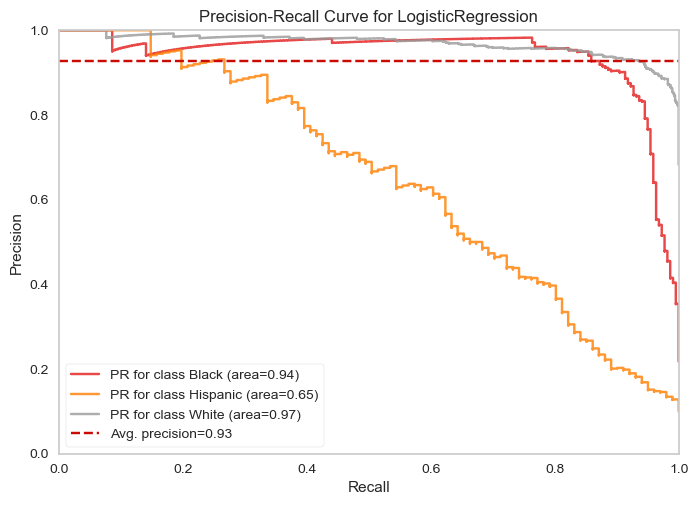

In [75]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [
    ("OneHotEncoder", column_transform),
    ("log", LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),]

pipe_log2 = Pipeline(steps=operations)

visualizer = PrecisionRecallCurve(
    pipe_log2,
    per_class=True, classes= ["Black", "Hispanic", "White"],   
    cmap="Set1"
)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();


In [76]:
visualizer.score_

{'Black': 0.9426523789439127,
 'Hispanic': 0.6516745523483202,
 'White': 0.9688803554950045,
 'micro': 0.927281020372456}

In [77]:
y_pred = log_model_grid.predict(X_test)

log_AP = visualizer.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 2. SVC

### Vanilla SVC model 

In [78]:
operations_svc = [("OneHotEncoder", column_transform), ("svc", SVC(class_weight="balanced",random_state=101))]

pipe_svc=Pipeline(steps=operations_svc)

In [79]:
pipe_svc.fit(X_train,y_train)
eval_metric(pipe_svc, X_train, y_train, X_test, y_test)

Test_Set
[[191  12  17]
 [  6  76  19]
 [ 12  91 587]]
              precision    recall  f1-score   support

       Black       0.91      0.87      0.89       220
    Hispanic       0.42      0.75      0.54       101
       White       0.94      0.85      0.89       690

    accuracy                           0.84      1011
   macro avg       0.76      0.82      0.78      1011
weighted avg       0.88      0.84      0.86      1011


Train_Set
[[ 853   34   24]
 [  11  385   51]
 [  51  400 2233]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93       911
    Hispanic       0.47      0.86      0.61       447
       White       0.97      0.83      0.89      2684

    accuracy                           0.86      4042
   macro avg       0.79      0.88      0.81      4042
weighted avg       0.90      0.86      0.87      4042



In [80]:

pipe_svc= Pipeline(steps=operations_svc)

scores = cross_validate(pipe_svc, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True  )
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.414545
train_precision_Hispanic    0.466374
test_recall_Hispanic        0.773939
train_recall_Hispanic       0.858313
test_f1_Hispanic            0.539616
train_f1_Hispanic           0.604282
dtype: float64

###  SVC Model GridsearchCV

In [81]:
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto', 0.1, 1]
}


In [82]:

grid_search_svc= GridSearchCV(pipe_svc, param_grid, verbose=3, cv=10, scoring=recall_Hispanic, n_jobs=-1, return_train_score=True)


In [83]:
grid_search_svc.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__gamma': ['scale', 'auto', 0.1, 1],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

#### Evaluate the model with the best hyperparameters on the test data
y_pred = best_pipeline.predict(X_test)
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

In [84]:
grid_search_svc.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('svc',
                 SVC(C=1, class_weight='balanced', kernel='linear',
                     random_state=101))])

In [85]:
grid_search_svc.best_params_


{'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}

In [86]:
eval_metric(grid_search_svc, X_train, y_train, X_test, y_test)

Test_Set
[[196  12  12]
 [  7  75  19]
 [ 13  86 591]]
              precision    recall  f1-score   support

       Black       0.91      0.89      0.90       220
    Hispanic       0.43      0.74      0.55       101
       White       0.95      0.86      0.90       690

    accuracy                           0.85      1011
   macro avg       0.76      0.83      0.78      1011
weighted avg       0.89      0.85      0.87      1011


Train_Set
[[ 860   29   22]
 [  14  378   55]
 [  62  357 2265]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93       911
    Hispanic       0.49      0.85      0.62       447
       White       0.97      0.84      0.90      2684

    accuracy                           0.87      4042
   macro avg       0.79      0.88      0.82      4042
weighted avg       0.90      0.87      0.88      4042



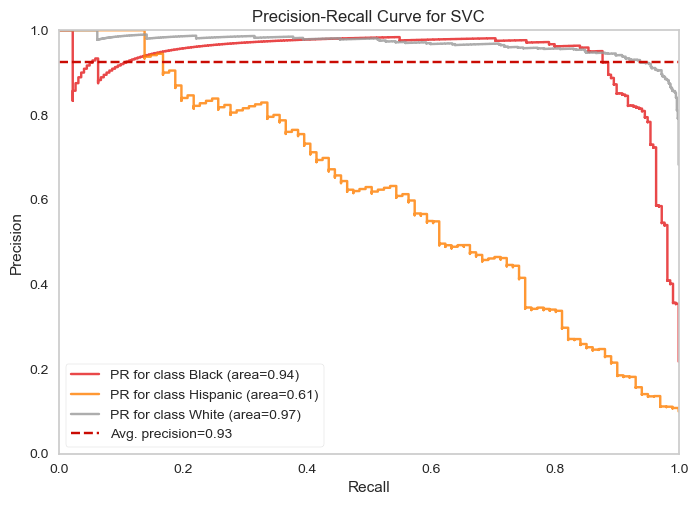

In [87]:
from yellowbrick.classifier import PrecisionRecallCurve

operations_svc = [("OneHotEncoder", column_transform), ("svc", SVC(class_weight="balanced",random_state=101))]

pipe_svc=Pipeline(steps=operations_svc)


visualizer_svc = PrecisionRecallCurve(
   pipe_svc,
    per_class=True, classes= ["Black", "Hispanic", "White"],   
    cmap="Set1"
)
visualizer_svc.fit(X_train, y_train)
visualizer_svc.score(X_test, y_test)
visualizer_svc.show();


In [88]:
y_pred_svc = grid_search_svc.predict(X_test)

svc_AP = visualizer_svc.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [89]:

X2 =df.drop("DODRace",axis=1)
y = df.DODRace    

In [90]:
# Create Column Transformer
cat_features = X.select_dtypes(include="object").columns


cat_features

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [91]:

ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

preprocessor = make_column_transformer((ordinal_encoder, cat_features), remainder="passthrough")


In [92]:
operations_rf = [("OrdinalEncoder", preprocessor), ('rf', RandomForestClassifier(class_weight="balanced", random_state=101))]

pipe_rf=Pipeline(steps=operations_rf)

pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [93]:
eval_metric(pipe_rf, X_train, y_train, X_test, y_test)

Test_Set
[[132   1  87]
 [  7   0  94]
 [  5   2 683]]
              precision    recall  f1-score   support

       Black       0.92      0.60      0.73       220
    Hispanic       0.00      0.00      0.00       101
       White       0.79      0.99      0.88       690

    accuracy                           0.81      1011
   macro avg       0.57      0.53      0.53      1011
weighted avg       0.74      0.81      0.76      1011


Train_Set
[[ 911    0    0]
 [   0  447    0]
 [   0    0 2684]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       911
    Hispanic       1.00      1.00      1.00       447
       White       1.00      1.00      1.00      2684

    accuracy                           1.00      4042
   macro avg       1.00      1.00      1.00      4042
weighted avg       1.00      1.00      1.00      4042



In [94]:
scores_rf = cross_validate(
    pipe_rf, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True)

In [95]:
df_scores_rf = pd.DataFrame(scores_rf, index=range(1, 6))
df_scores_rf.mean()[2:]

test_precision_Hispanic     0.681818
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.040325
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.073973
train_f1_Hispanic           1.000000
dtype: float64

### RF Model GridsearchCV

In [96]:
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}


In [97]:
grid_search_rf = GridSearchCV(pipe_rf, param_grid, cv=5, scoring=recall_Hispanic, n_jobs=-1, return_train_score=True )

grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10, 20],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100, 200]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [98]:
grid_search_rf.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_leaf=4,
                                        min_samples_split=10,
                                        random_state=101))])

In [99]:
grid_search_rf.best_params_

{'rf__max_depth': 10,
 'rf__min_samples_leaf': 4,
 'rf__min_samples_split': 10,
 'rf__n_estimators': 100}

In [100]:
eval_metric(grid_search_rf, X_train, y_train, X_test, y_test)

Test_Set
[[167  11  42]
 [ 11  26  64]
 [ 17  37 636]]
              precision    recall  f1-score   support

       Black       0.86      0.76      0.80       220
    Hispanic       0.35      0.26      0.30       101
       White       0.86      0.92      0.89       690

    accuracy                           0.82      1011
   macro avg       0.69      0.65      0.66      1011
weighted avg       0.81      0.82      0.81      1011


Train_Set
[[ 880    6   25]
 [   2  421   24]
 [  31   51 2602]]
              precision    recall  f1-score   support

       Black       0.96      0.97      0.96       911
    Hispanic       0.88      0.94      0.91       447
       White       0.98      0.97      0.98      2684

    accuracy                           0.97      4042
   macro avg       0.94      0.96      0.95      4042
weighted avg       0.97      0.97      0.97      4042



In [101]:
viz = PrecisionRecallCurve(
    grid_search_rf,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)


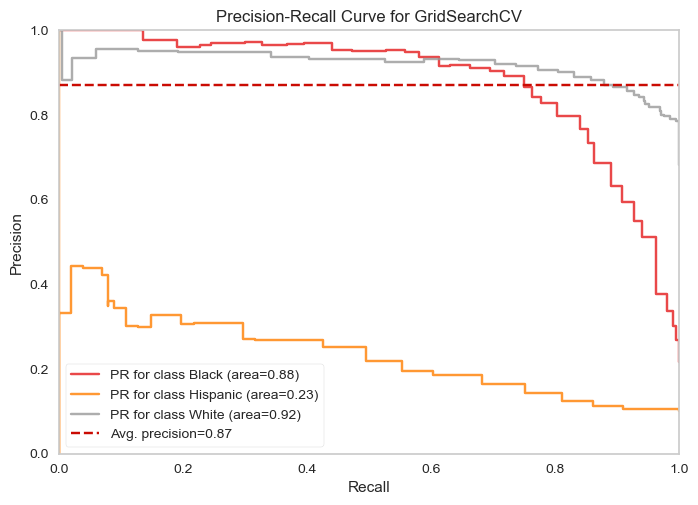

In [102]:
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [103]:
y_pred = grid_search_rf.predict(X_test)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [104]:
operations_xgb = [
    ("OrdinalEncoder", preprocessor),
    ("XGB_model", XGBClassifier(random_state=101)),
]

pipe_xgb = Pipeline(steps=operations_xgb)

y_train_xgb = y_train.map({"Black": 0, "Hispanic": 1, "White": 2})
y_test_xgb = y_test.map({"Black": 0, "Hispanic": 1, "White": 2})



pipe_xgb.fit(X_train, y_train_xgb)

# Mapping for encoding the target labels
#target_mapping = {'White': 0, 'Black': 1, 'Hispanic': 2}
#target_encoded = [target_mapping[label] for label in target]


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [105]:
# calculate class weights based on the training data
classes_weights = class_weight.compute_sample_weight(class_weight="balanced", y=y_train_xgb)
classes_weights


#class_weights = compute_class_weight('balanced', classes=[0, 1, 2], y=y_train_xgb)

array([1.47896085, 0.50198708, 1.47896085, ..., 3.01416853, 1.47896085,
       0.50198708])

In [106]:
eval_metric(pipe_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[184   6  30]
 [ 10  24  67]
 [  9   4 677]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       220
           1       0.71      0.24      0.36       101
           2       0.87      0.98      0.92       690

    accuracy                           0.88      1011
   macro avg       0.83      0.69      0.72      1011
weighted avg       0.86      0.88      0.86      1011


Train_Set
[[ 911    0    0]
 [   0  447    0]
 [   0    0 2684]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       911
           1       1.00      1.00      1.00       447
           2       1.00      1.00      1.00      2684

    accuracy                           1.00      4042
   macro avg       1.00      1.00      1.00      4042
weighted avg       1.00      1.00      1.00      4042



In [107]:
pipe_xgb.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [108]:
eval_metric(pipe_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[189   7  24]
 [  7  38  56]
 [ 12  11 667]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       220
           1       0.68      0.38      0.48       101
           2       0.89      0.97      0.93       690

    accuracy                           0.88      1011
   macro avg       0.83      0.73      0.77      1011
weighted avg       0.87      0.88      0.87      1011


Train_Set
[[ 911    0    0]
 [   0  447    0]
 [   0    0 2684]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       911
           1       1.00      1.00      1.00       447
           2       1.00      1.00      1.00      2684

    accuracy                           1.00      4042
   macro avg       1.00      1.00      1.00      4042
weighted avg       1.00      1.00      1.00      4042



In [109]:
scoring_xgb = {
    "precision_Hispanic": make_scorer(precision_score, average=None, labels=[1]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=[1]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=[1]),
}

In [110]:
#model = XGBClassifier(random_state=101)



scores_xgb = cross_validate(pipe_xgb, X_train, y_train_xgb, scoring=scoring_xgb, cv=5, n_jobs=-1, return_train_score=True, fit_params={"XGB_model__sample_weight": classes_weights},)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]


test_precision_Hispanic     0.414545
train_precision_Hispanic    0.466374
test_recall_Hispanic        0.773939
train_recall_Hispanic       0.858313
test_f1_Hispanic            0.539616
train_f1_Hispanic           0.604282
dtype: float64

### XGBoost Model GridsearchCV

In [111]:
param_grid = {
    'XGB_model__n_estimators': [50, 100, 200],
    'XGB_model__max_depth': [3, 4, 5],
    "XGB_model__learning_rate": [0.03, 0.05],
    "XGB_model__subsample": [0.8, 1],
    "XGB_model__colsample_bytree": [0.8, 1],
}

In [112]:
operations_xgb = [
    ("OrdinalEncoder", preprocessor),
    ("XGB_model", XGBClassifier(random_state=101))]


In [113]:
pipe_xgb = Pipeline(steps=operations_xgb)

grid_xgb = GridSearchCV(
    pipe_xgb,
    param_grid,
    scoring=make_scorer(recall_score, average=None, labels=[1]),
    cv=5,
    n_jobs=-1,
    return_train_score=True, verbose = 2)

In [114]:
xgb_grid_model = GridSearchCV(
    pipe_xgb,
    param_grid,
    scoring=make_scorer(recall_score, average=None, labels=[1]),
    cv=5,
    n_jobs=-1,
    return_train_score=True,)


In [115]:
xgb_grid_model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks...
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [3, 4, 5],
                         'XGB_model__n_estimators': [50, 100, 200],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [116]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.03,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [117]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 0.03,
 'XGB_model__max_depth': 3,
 'XGB_model__n_estimators': 200,
 'XGB_model__subsample': 0.8}

In [118]:
xgb_grid_model.best_score_

0.6533832709113607

In [119]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[181  20  19]
 [ 15  61  25]
 [ 27  79 584]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       220
           1       0.38      0.60      0.47       101
           2       0.93      0.85      0.89       690

    accuracy                           0.82      1011
   macro avg       0.71      0.76      0.72      1011
weighted avg       0.85      0.82      0.83      1011


Train_Set
[[ 845   28   38]
 [  13  369   65]
 [ 104  302 2278]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       911
           1       0.53      0.83      0.64       447
           2       0.96      0.85      0.90      2684

    accuracy                           0.86      4042
   macro avg       0.79      0.87      0.82      4042
weighted avg       0.89      0.86      0.87      4042



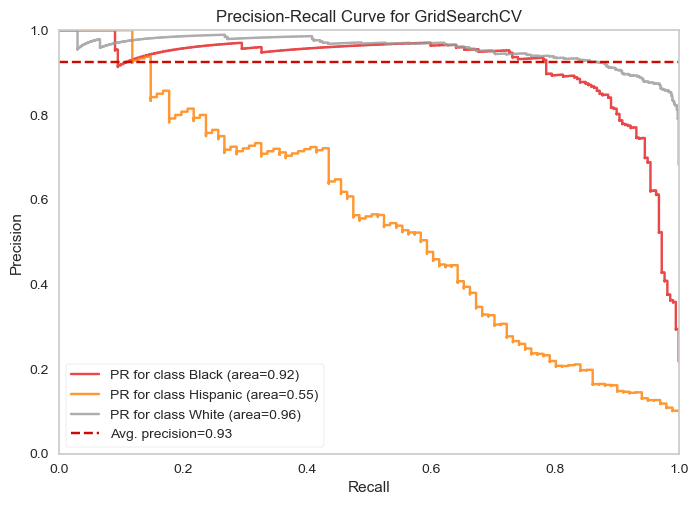

In [120]:
viz = PrecisionRecallCurve(
    xgb_grid_model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();


In [121]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = viz.score_["Hispanic"]
xgb_f1 = f1_score(y_test_xgb, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test_xgb, y_pred, average=None, labels=[1])

In [122]:
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
        "AP": [log_AP, svc_AP, rf_AP, xgb_AP],
    }
)




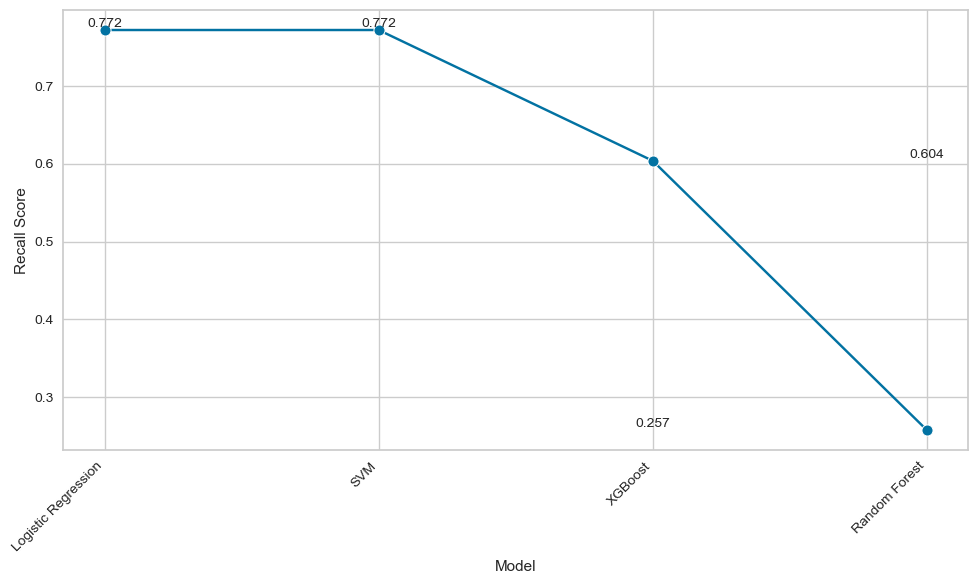

In [123]:
compare = compare.sort_values(by="Recall", ascending=False)

# Create a larger line plot to visualize Recall scores
plt.figure(figsize=(10, 6))  # Set the figure size

ax = sns.lineplot(x="Model", y="Recall", data=compare, marker="o", palette="Blues_d", markersize=8)  # Increase marker size
ax.set(xlabel='Model', ylabel='Recall Score')  # Set axis labels
ax.set_xticklabels(compare["Model"], rotation=45, ha="right")  # Rotate x-axis labels for readability


for index, row in compare.iterrows():
    ax.text(row.name, row.Recall, f'{row.Recall:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show() 


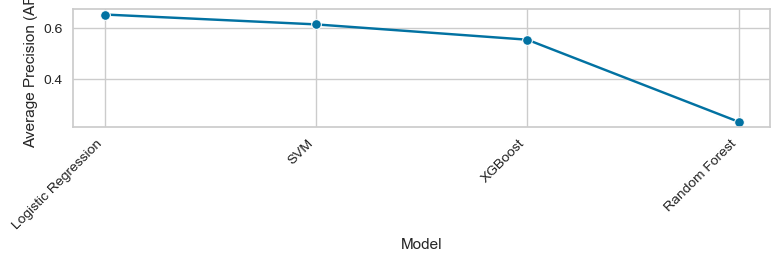

In [124]:
compare = compare.sort_values(by="AP", ascending=False)

# Create a line plot to visualize AP (Average Precision) scores over a range
plt.subplot(313)
ax = sns.lineplot(x="Model", y="AP", data=compare, marker="o", palette="Blues_d")
ax.set(xlabel='Model', ylabel='Average Precision (AP)')  # Set axis labels
ax.set_xticklabels(compare["Model"], rotation=45, ha="right")  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()  # Display the plot

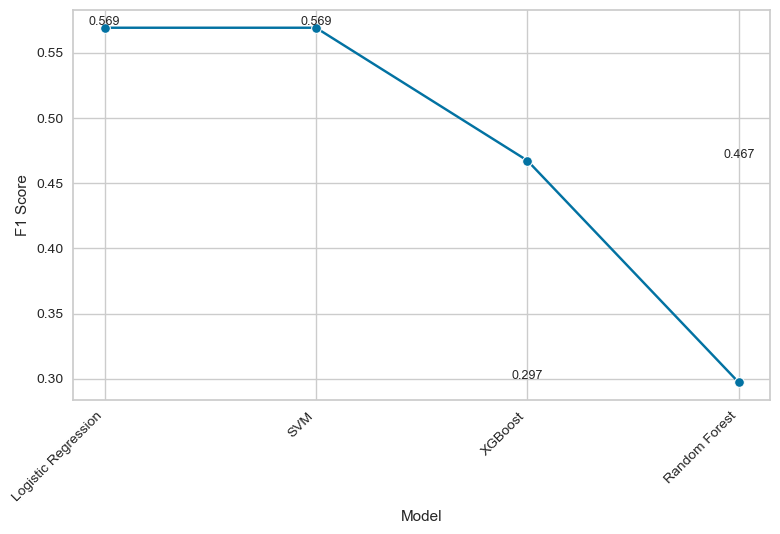

In [125]:
compare = compare.sort_values(by="F1", ascending=False)

# Create a line plot to visualize F1 scores
ax = sns.lineplot(x="Model", y="F1", data=compare, marker="o", palette="Blues_d")
ax.set(xlabel='Model', ylabel='F1 Score')  # Set axis labels
ax.set_xticklabels(compare["Model"], rotation=45, ha="right")  


for index, row in compare.iterrows():
    ax.text(row.name, row.F1, f'{row.F1:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()  # Display the plot

---
---

---
---

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [126]:
# Logistic regression has better scores than the other models, we will go with log. regression 

column_trans_deploy = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features),
    remainder=MinMaxScaler(),)


operations_deploy = [("OneHotEncoder", column_trans_deploy),
    ("log", LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),),]

deploy_model = Pipeline(steps=operations_deploy)

In [127]:
deploy_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

## Other Evaluation Metrics for Multiclass Classification

In [128]:
from sklearn.metrics import matthews_corrcoef

y_pred = deploy_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7426294576287565

In [129]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.7339972250562654

In [130]:
y_pred = deploy_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7426294576287565

In [131]:
cohen_kappa_score(y_test, y_pred)

0.7339972250562654

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [132]:
!pip install imblearn

In [133]:
import sklearn
sklearn.__version__

'1.2.2'

In [134]:
pip install scikit-learn==1.2.2

Note: you may need to restart the kernel to use updated packages.


In [135]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


In [136]:
column_transform = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features),
    remainder=MinMaxScaler(),
)

In [137]:
over_sample = SMOTE()
under_sample = RandomUnderSampler() 



In [138]:
X_train_enc = column_transform.fit_transform(X_train)

In [139]:
X_train_over, y_train_over = over_sample.fit_resample(X_train_enc, y_train)

In [140]:
over_sample = SMOTE(sampling_strategy={"Hispanic": 1100})
under_sample = RandomUnderSampler(sampling_strategy={"White": 2400})
X_over, y_over = over_sample.fit_resample(X_train_enc, y_train)


In [141]:
y_over.value_counts()

White       2684
Hispanic    1100
Black        911
Name: DODRace, dtype: int64

In [142]:
X_under, y_under = under_sample.fit_resample(X_train_enc, y_train)

In [143]:
y_under.value_counts()

White       2400
Black        911
Hispanic     447
Name: DODRace, dtype: int64

In [144]:
# Creating the imblearn pipeline
# imbpipeline did not work, used pipeline instead

operations_sampling = [('Over_Sampling', over_sample), ('Under_sampling', under_sample)]

pipeline = Pipeline(steps=operations_sampling)

X_resampled, y_resampled = pipeline.fit_resample(X_train_enc, y_train)

In [145]:
y_train.value_counts()

White       2684
Black        911
Hispanic     447
Name: DODRace, dtype: int64

In [146]:
y_resampled.value_counts()

White       2400
Hispanic    1100
Black        911
Name: DODRace, dtype: int64

## Logistic Regression Over/ Under Sampling

In [147]:


column_transform = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)



# Create a pipeline with SMOTE, ColumnTransformer, and Logistic Regression
operations = [
    ("OneHotEncoder", column_transform),
    ("Over_Sample", over_sample),
    ("Under_Sample", under_sample),
    ("log", LogisticRegression(max_iter=10000, random_state=101)),
] 


In [148]:
smote_pipeline = Pipeline(steps=operations)

In [149]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('Over_Sample', SMOTE(sampling_strategy={'Hispanic': 1100})),
                ('Under_Sample',
                 RandomUnderSampler(sampling_strategy={'White': 2400})),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

In [150]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[188  12  20]
 [  5  65  31]
 [  7  34 649]]
              precision    recall  f1-score   support

       Black       0.94      0.85      0.90       220
    Hispanic       0.59      0.64      0.61       101
       White       0.93      0.94      0.93       690

    accuracy                           0.89      1011
   macro avg       0.82      0.81      0.81      1011
weighted avg       0.90      0.89      0.89      1011


Train_Set
[[ 834   27   50]
 [  16  320  111]
 [  23  156 2505]]
              precision    recall  f1-score   support

       Black       0.96      0.92      0.93       911
    Hispanic       0.64      0.72      0.67       447
       White       0.94      0.93      0.94      2684

    accuracy                           0.91      4042
   macro avg       0.84      0.85      0.85      4042
weighted avg       0.91      0.91      0.91      4042



In [151]:
model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.568874
train_precision_Hispanic    0.626548
test_recall_Hispanic        0.666768
train_recall_Hispanic       0.719610
test_f1_Hispanic            0.612750
train_f1_Hispanic           0.669819
dtype: float64

# SHAP

In [152]:
import shap

In [153]:
trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features), remainder=MinMaxScaler(),
    verbose_feature_names_out=False,)

X_train_trans = trans_shap.fit_transform(X_train)
X_test_trans = trans_shap.transform(X_test)

model_shap = LogisticRegression(
    class_weight="balanced",
    max_iter=10000,
    random_state=101,
    penalty="l1",
    solver="saga",
)

model_shap.fit(X_train_trans, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [154]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

Test_Set
[[197  12  11]
 [  6  75  20]
 [ 10  84 596]]
              precision    recall  f1-score   support

       Black       0.92      0.90      0.91       220
    Hispanic       0.44      0.74      0.55       101
       White       0.95      0.86      0.91       690

    accuracy                           0.86      1011
   macro avg       0.77      0.83      0.79      1011
weighted avg       0.89      0.86      0.87      1011


Train_Set
[[ 856   33   22]
 [  19  371   57]
 [  46  338 2300]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93       911
    Hispanic       0.50      0.83      0.62       447
       White       0.97      0.86      0.91      2684

    accuracy                           0.87      4042
   macro avg       0.80      0.88      0.82      4042
weighted avg       0.91      0.87      0.88      4042



# SHAP values for all data

In [160]:
column_trans_shap = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

# Transform the training and test data
X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

In [161]:
# Create a SHAP explainer for the logistic regression model
explainer = shap.LinearExplainer(model_shap, X_train_trans)

In [162]:
# Compute SHAP values for the test data
# In real life scenario, it is not recommended to use the test dataset
shap_values = explainer.shap_values(X_test_trans)

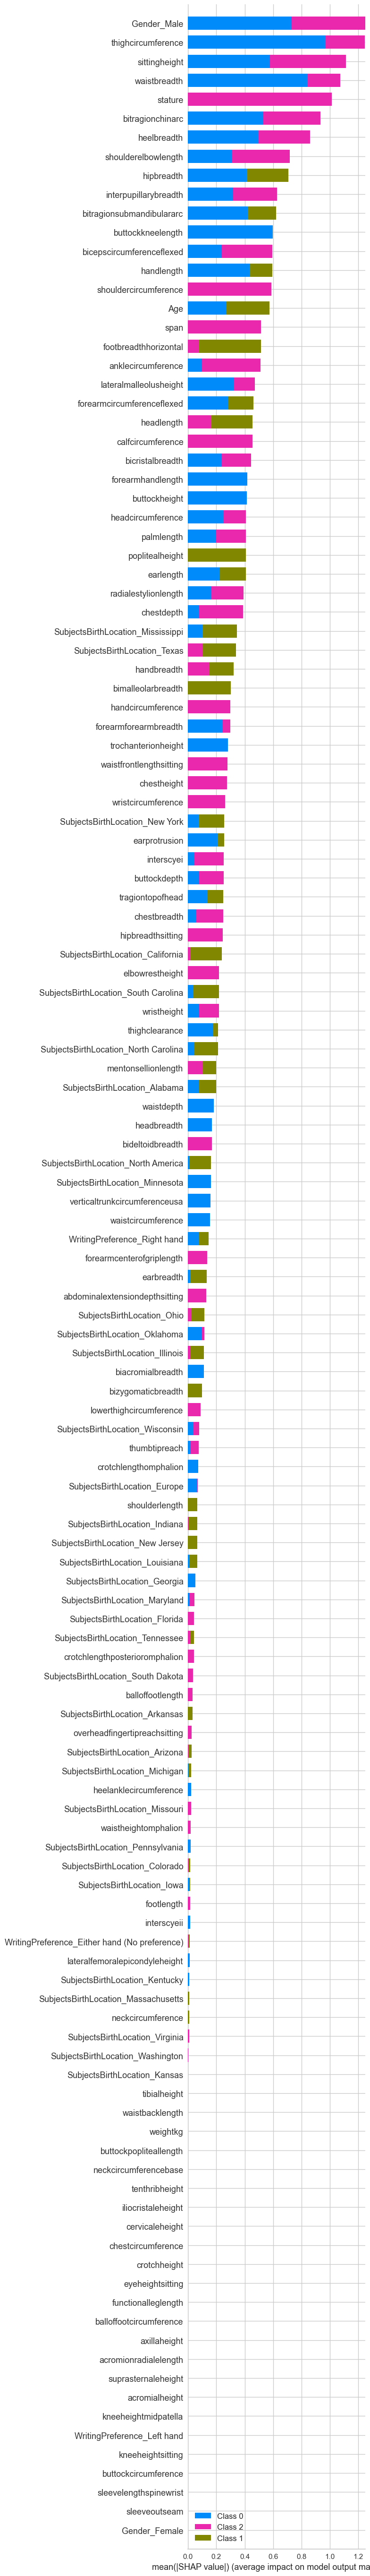

In [163]:
# Visualize the SHAP values
shap.summary_plot(shap_values, X_test_trans, max_display=300, feature_names=column_trans_shap.get_feature_names_out())

In [164]:
shap_values

[array([[-0.        , -0.5779148 , -0.02860565, ...,  0.        ,
          0.03754468, -0.41085914],
        [ 0.        ,  1.07327034, -0.02860565, ..., -0.        ,
         -0.05797829,  0.40233991],
        [-0.        , -0.5779148 , -0.02860565, ...,  0.        ,
          0.0188554 , -0.33341161],
        ...,
        [ 0.        ,  1.07327034, -0.02860565, ..., -0.        ,
          0.24520331, -0.0236215 ],
        [-0.        , -0.5779148 , -0.02860565, ...,  0.        ,
         -0.04551877,  0.86702508],
        [ 0.        ,  1.07327034, -0.02860565, ..., -0.        ,
          0.11853155,  0.0925498 ]]),
 array([[-0.        ,  0.        ,  0.04202999, ...,  0.        ,
         -0.        ,  0.45667233],
        [ 0.        , -0.        ,  0.04202999, ..., -0.        ,
          0.        , -0.44720316],
        [-0.        ,  0.        ,  0.04202999, ...,  0.        ,
         -0.        ,  0.37058895],
        ...,
        [ 0.        , -0.        ,  0.04202999, ..., -

In [165]:
print(shap_values[0].shape)

(1011, 133)


# SHAP - Feature Selection

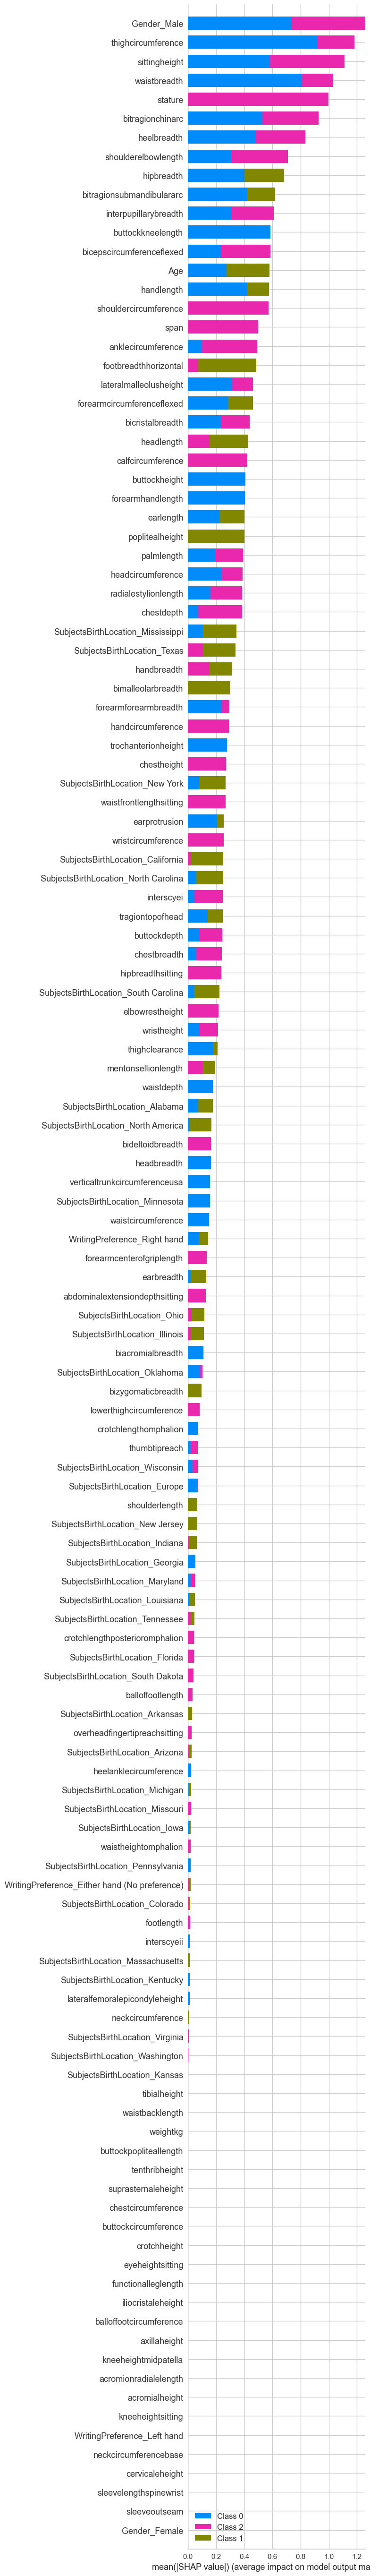

In [167]:
column_transform_shap = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)


X_train_trans = column_transform_shap.fit_transform(X_train)

explainer = shap.Explainer(model_shap, X_train_trans)

shap_values = explainer.shap_values(X_train_trans)

shap.summary_plot(shap_values, X_train_trans, max_display=300,feature_names=column_transform_shap.get_feature_names_out())

In [168]:
# Create a SHAP explainer for the logistic regression model
explainer = shap.LinearExplainer(model_shap, X_train_trans)

# Compute SHAP values for the test data
shap_values = explainer.shap_values(X_test_trans)


i = 0  

# prediction
prediction = model_shap.predict(X_test_trans[i].reshape(1, -1))[0]
print(f"The model predicted: {prediction}")


shap.initjs()

# Visualize the prediction
shap.force_plot(explainer.expected_value[1], shap_values[1][i], X_test_trans[i], feature_names=column_transform_shap.get_feature_names_out())



The model predicted: White


- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___